In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
spiral = pd.read_table("spiral.txt", sep = '\s+', header = None)
spiral.head()

,0,1,2
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3


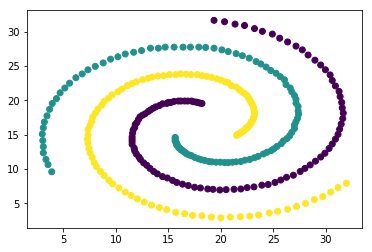

In [61]:
plt.scatter(spiral.loc[:,0],spiral.loc[:,1], c=spiral.loc[:,2])

In [13]:
from sklearn.metrics import pairwise_distances
#default metric = Euclidean

In [15]:
d = pairwise_distances(spiral.loc[:,[0,1]])

In [16]:
d.shape

(312, 312)

In [33]:
d.ndim

2

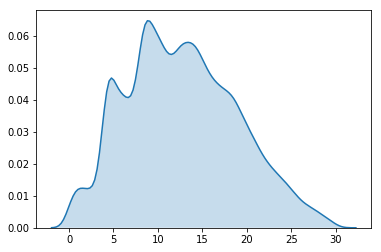

In [23]:
import seaborn as sns

sns.kdeplot(d.flatten(),shade = True)

#kde = kernel density estimate

In [24]:
spiral.var()

0    53.288880
1    47.158871
2     0.665337
dtype: float64

In [25]:
spiral.describe()

,0,1,2
count,312.000000,312.000000,312.000000
mean,18.408173,16.344712,2.016026
std,7.299923,6.867232,0.815682
min,3.000000,2.900000,1.000000
25%,12.912500,11.337500,1.000000
50%,18.325000,16.050000,2.000000
75%,23.400000,21.362500,3.000000
max,31.950000,31.650000,3.000000


In [27]:
#7.299923**2

In [34]:
from scipy.stats import kde

In [37]:
model = kde.gaussian_kde(d.flatten())

In [39]:
x_vals = np.linspace(1,1.5,num=50)
x_vals

array([1.        , 1.01020408, 1.02040816, 1.03061224, 1.04081633,
       1.05102041, 1.06122449, 1.07142857, 1.08163265, 1.09183673,
       1.10204082, 1.1122449 , 1.12244898, 1.13265306, 1.14285714,
       1.15306122, 1.16326531, 1.17346939, 1.18367347, 1.19387755,
       1.20408163, 1.21428571, 1.2244898 , 1.23469388, 1.24489796,
       1.25510204, 1.26530612, 1.2755102 , 1.28571429, 1.29591837,
       1.30612245, 1.31632653, 1.32653061, 1.33673469, 1.34693878,
       1.35714286, 1.36734694, 1.37755102, 1.3877551 , 1.39795918,
       1.40816327, 1.41836735, 1.42857143, 1.43877551, 1.44897959,
       1.45918367, 1.46938776, 1.47959184, 1.48979592, 1.5       ])

In [40]:
model(x_vals)

array([0.01217801, 0.01219531, 0.01221196, 0.01222797, 0.01224334,
       0.01225809, 0.01227222, 0.01228575, 0.01229869, 0.01231104,
       0.01232282, 0.01233403, 0.01234469, 0.0123548 , 0.01236439,
       0.01237344, 0.01238199, 0.01239004, 0.01239759, 0.01240466,
       0.01241126, 0.0124174 , 0.01242309, 0.01242834, 0.01243316,
       0.01243756, 0.01244155, 0.01244515, 0.01244835, 0.01245117,
       0.01245362, 0.01245572, 0.01245746, 0.01245887, 0.01245994,
       0.01246069, 0.01246113, 0.01246127, 0.01246112, 0.01246068,
       0.01245997, 0.01245899, 0.01245776, 0.01245628, 0.01245455,
       0.0124526 , 0.01245043, 0.01244804, 0.01244545, 0.01244265])

In [41]:
max(model(x_vals))

0.012461273020626776

In [42]:
x_vals[model(x_vals)==max(model(x_vals))]

#found eps

array([1.37755102])

In [46]:
min_pts = (d<=1.38).sum(axis=0)
min_pts

array([ 2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        4,  3,  5,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  6,  6,  6,  6,  7,  7,  6,  7,  7,  7,  7,  7,  7,  8,  8,  8,
        8,  9,  9, 10, 11, 11, 12, 13, 15, 15, 16, 16, 15, 15, 14, 14, 13,
       13, 12, 11, 10,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  4,  3,  4,  3,  4,  4,  5,  4,  4,  4,  4,  4,  5,  4,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,
        6,  5,  7,  7,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        8,  7,  7,  8,  9,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10,  9,  8,
        8,  7,  6,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3

(array([  3.,   0.,   0., 107.,   0.,   0.,   0.,  18.,   0.,   0.,  70.,
          0.,   0.,   0.,  18.,   0.,   0.,  34.,   0.,   0.,   0.,  13.,
          0.,   0.,   0.,  12.,   0.,   0.,   7.,   0.,   0.,   0.,   4.,
          0.,   0.,   5.,   0.,   0.,   0.,   4.,   0.,   0.,   8.,   0.,
          0.,   0.,   7.,   0.,   0.,   2.]),
 array([ 2.  ,  2.28,  2.56,  2.84,  3.12,  3.4 ,  3.68,  3.96,  4.24,
         4.52,  4.8 ,  5.08,  5.36,  5.64,  5.92,  6.2 ,  6.48,  6.76,
         7.04,  7.32,  7.6 ,  7.88,  8.16,  8.44,  8.72,  9.  ,  9.28,
         9.56,  9.84, 10.12, 10.4 , 10.68, 10.96, 11.24, 11.52, 11.8 ,
        12.08, 12.36, 12.64, 12.92, 13.2 , 13.48, 13.76, 14.04, 14.32,
        14.6 , 14.88, 15.16, 15.44, 15.72, 16.  ]),
 <a list of 50 Patch objects>)

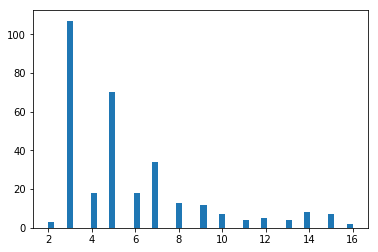

In [48]:
plt.hist(min_pts, bins = 50)
#gradual uplift from 2, thus take min_pnt as 2

(array([110.,  18.,  88.,  34.,  13.,  19.,   4.,   9.,   8.,   9.]),
 array([ 2. ,  3.4,  4.8,  6.2,  7.6,  9. , 10.4, 11.8, 13.2, 14.6, 16. ]),
 <a list of 10 Patch objects>)

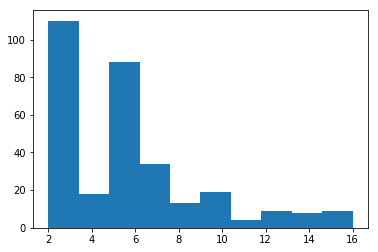

In [49]:
plt.hist(min_pts)
#not very much helpful

In [50]:
eps = 1.38
MinPt = 2

In [51]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps = eps, min_samples = MinPt, n_jobs = 4)

In [54]:
clusters = dbs.fit_predict(X=spiral.loc[:,[0,1]])

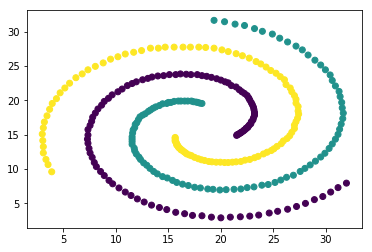

In [58]:
#checking if we have clustered our data well or not -
#plotting clusters
plt.scatter(spiral.loc[:,0],spiral.loc[:,1], c=clusters)

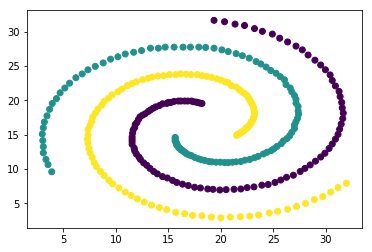

In [59]:
plt.scatter(spiral.loc[:,0],spiral.loc[:,1], c=spiral.loc[:,2])
#plotting original data